In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, '/Users/chris/Documents/PhD/ProjectSigma/GalaxyTools')
import time

from HM2SM import halo_mass_to_stellar_mass
from VelocityDispersionLibrary import Sigma
from Bernardi import bernardi_sigma 
from darkmatter import getC

In [2]:
# Params

HM = 10



SM = 9
size = 3.2
n = 3.12

BHMass = 8.26

length = 100
R_range = np.logspace(-2, 3, length)

c = np.ones_like(R_range) * getC(HM, 0.0)
beta = np.ones_like(R_range) * 0.0001
r_array = np.ones_like(R_range) * size
sm_array = np.ones_like(R_range) * SM
n_array = np.ones_like(R_range) * n



In [3]:
start = time.time()
CompleteSigmaAp = Sigma(R_range, beta, r_array, n_array, sm_array, 0, DM = "None", HaloMass = HM, haloC=c,
                         BlackHole=False, BHMass=BHMass, stars=True)

end = time.time()
print(end - start, "Seconds")

print(CompleteSigmaAp)


[1, 0, 0]
7.910833835601807 Seconds
[ 2.8620455  2.9039154  2.9478798  2.9940565  3.0425677  3.0935454
  3.1471262  3.2034569  3.2626894  3.324985   3.3905137  3.4594502
  3.5319805  3.608296   3.6885953  3.7730837  3.861971   3.9554708
  5.05379    7.526782   9.117258  10.282477  11.186035  11.90877
 12.49976   12.989603  13.400194  13.746141  14.038932  14.286836
 14.495937  14.67231   14.818365  14.936928  15.030475  15.10044
 15.148641  15.175858  15.18375   15.172818  15.144152  15.0985365
 15.036885  14.960219  14.869382  14.765738  14.650103  14.524725
 14.39105   14.249479  14.101842  13.949377  13.7937975 13.637136
 13.480578  13.325797  13.174481  13.027929  12.886996  12.754353
 12.629017  12.513126  12.407865  12.307514  12.2202015 12.143883
 12.078575  12.023643  11.977906  11.939576  11.908145  11.885267
 11.864968  11.851741  11.838366  11.831794  11.824406  11.819847
 11.817967  11.816783  11.814287  11.817011  11.815585  11.815009
 11.816435  11.808889  11.813214  11.8

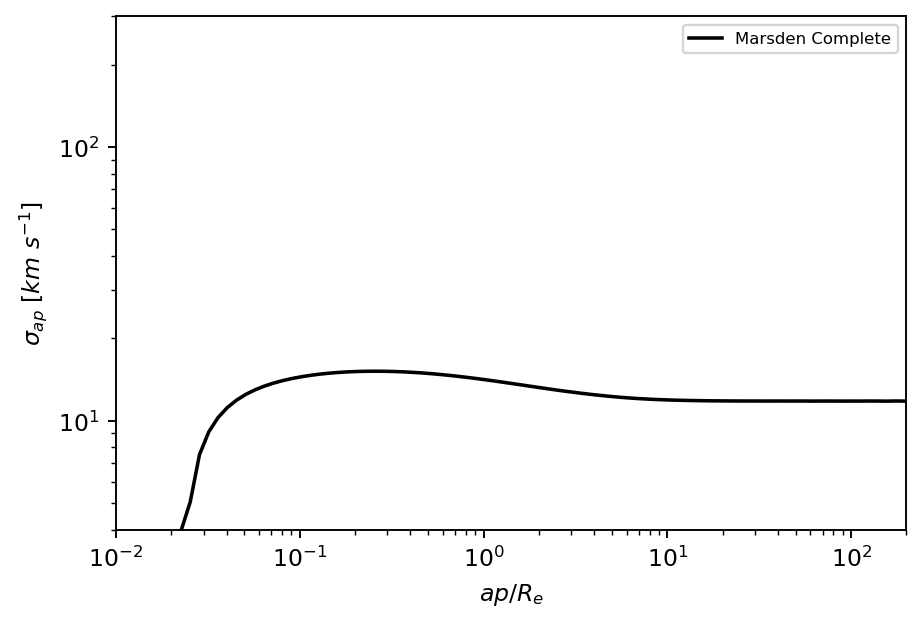

In [4]:

plt.figure(dpi=170)
plt.plot(R_range/size, CompleteSigmaAp, 'k', label = "Marsden Complete")

plt.loglog()
plt.xlim([0.01, 200])
plt.ylim([4, 300])

plt.xlabel("$ap/R_e$")
plt.ylabel("$\sigma_{ap}$ [$km$ $s^{-1}$]")

plt.legend(fontsize = 7)

plt.show()

